# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

<div class="alert alert-block alert-warning">
I will use yellow boxes to highlight personal comments (i.e. markdown cells that I have written in between the code cells) to better differentiate between "template" markdown cells and my own markdown cells. 
</div>

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
#patch_sklearn()                     # library you can uncomment these lines for a speedup

import seaborn as sns
from sklearn.model_selection import KFold


scikit-learn version:  1.0.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Mario Rossi<br>
**ID Number**: 1234567

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [3]:
ID = 2090566 + 1
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [6]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Number of samples in the training dataset:", X_train.shape[0])
print("Number of samples in the test dataset:", X_test.shape[0])

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Number of samples in the training dataset: 500
Number of samples in the test dataset: 59500
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [42 46 42 58 56 61 51 47 41 56]


In [7]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


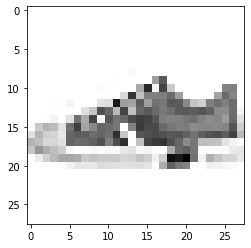

LABEL: 7
INPUT:


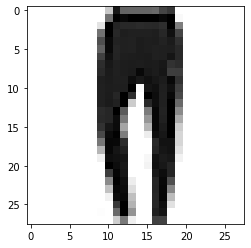

LABEL: 1
INPUT:


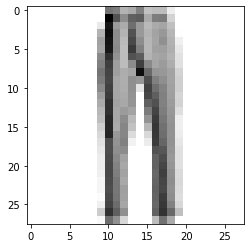

LABEL: 1


In [8]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [11]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (25,10,), (50,25,10) ]}

# multi-layer perceptron classifier
mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)

# grid search cross validation over the architecture parameters
mlp_arch_CV = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1, verbose=1)
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_arch_CV.best_params_)

print("Score with best parameters:")
print(mlp_arch_CV.best_score_)

print("\nMean scores on the grid:")
print(mlp_arch_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.7460000000000001

Mean scores on the grid:
[0.654 0.728 0.746 0.536 0.488]


**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [12]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!


parameters = {'batch_size': [1, 32, 400]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = KFold(n_splits=5, shuffle=True, random_state=ID)
best_hidden_layer_sizes = mlp_arch_CV.best_params_['hidden_layer_sizes']
mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1, hidden_layer_sizes=best_hidden_layer_sizes)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf, n_jobs=-1, verbose=1)
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_batch_CV.best_params_)

print("Score with best parameters:")
print(mlp_batch_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_batch_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
RESULTS FOR NN

Best parameters set found:
{'batch_size': 400}
Score with best parameters:
0.744

All scores on the grid:
[0.11  0.706 0.744]


<div class="alert alert-block alert-warning">
To better understand the behavior of the learning model with respect to both the architecture and the batch size, let me build a slightly bigger grid search combining the two parameters. <br>
</div>

In [55]:
parameters = {
    "hidden_layer_sizes": [(10,), (25,), (50,), (25,10,), (50,25,10)],
    "batch_size": [1, 32, 100, 200, 400],
}

kf = KFold(n_splits=5, shuffle=True, random_state=ID)

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)

mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf, n_jobs=-1, verbose=1)
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_batch_CV.best_params_)

print("Score with best parameters:")
print(mlp_batch_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_batch_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
RESULTS FOR NN

Best parameters set found:
{'batch_size': 200, 'hidden_layer_sizes': (50,)}
Score with best parameters:
0.748

All scores on the grid:
[0.086 0.09  0.11  0.112 0.074 0.588 0.68  0.706 0.396 0.446 0.616 0.746
 0.744 0.572 0.5   0.652 0.744 0.748 0.454 0.546 0.698 0.73  0.744 0.582
 0.388]


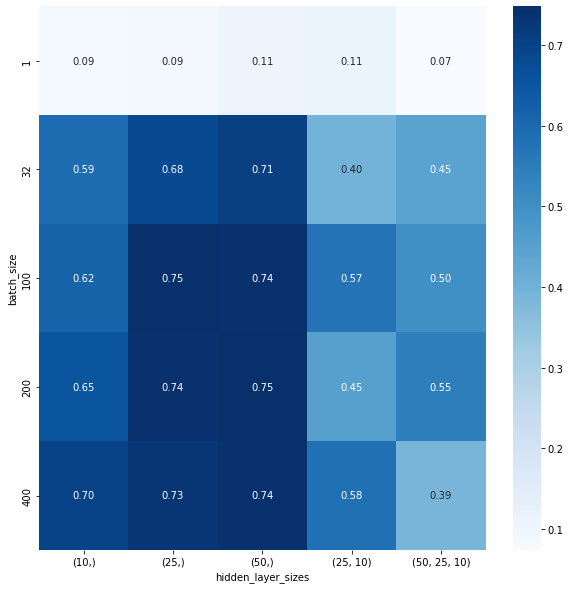

In [60]:
# display the score for each parameter combination tested during the grid search using a heatmap

mat = mlp_batch_CV.cv_results_['mean_test_score'].reshape(5,5)

fig, ax = plt.subplots(figsize=(10,10))

# im = ax.imshow(mat, cmap='Blues', interpolation='nearest')
im = sns.heatmap(mat, annot=True, fmt=".2f", cmap='Blues', ax=ax)
    
    
ax.set_xticklabels(parameters['hidden_layer_sizes'])
ax.set_yticklabels(parameters['batch_size'])

ax.set_xlabel('hidden_layer_sizes')
ax.set_ylabel('batch_size')

plt.show()

**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

<div class="alert alert-block alert-info">
<strong>ANSWER A.Q1</strong>:<br>

For what concernes the architecture of the network, I have observed that the best architecture strongly depends on the training set at hand. In particular, I am not referring to the dimension of the training set, but to the random choice of 500 examples out of the entire dataset. In fact, I have observed that the best architecture for a given training set is not necessarily the best architecture for another training set. This is due to the fact that the training set is not representative of the entire dataset, and therefore the best architecture for a given training set might not be the best architecture for the entire dataset. Howeser, the preferred networks have one single layer of 25 or 50 neurons. Hence, simple networks are (almost always) preferred to complex networks. <br>

Surprisingly, the best batch size corresponds to having the standard gradient descent. I would have expected that the best batch size would have been a sweet spot between the batch size of 1 and the batch size of 400. However, this is not the case, and I can speculate that this is due to the fact that the training set is not representative of the entire dataset. <br>

Finally, I have not seen any significant difference in the convergence of the training for different batch sizes. <br>

To give a more complete answer, though, I have built a slightly bigger grid search that takes into account both the architecture and the batch size simultaneously. The results are coherent with the previous ones: the preferred networks are always the simple ones, although the simplest one (10 neurons in a single layer) performes slightly worse. Complex networks struggle due to the small size of the training set. The best batch size instead is not always the standard gradient descent, as I was expecting from the beginning. Though, since the score fluctuations are so small, I would say that using one layer of 25 neurons or one layer of 50 neurons with a sufficiently large batch size works fine. <br>


</div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

In [61]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}

best_hidden_layer_sizes = mlp_arch_CV.best_params_['hidden_layer_sizes']
best_batch_size = mlp_batch_CV.best_params_['batch_size']

print(f'Best hidden layer sizes: {best_hidden_layer_sizes}')
print(f'Best batch size: {best_batch_size}')

Best hidden layer sizes: (50,)
Best batch size: 200


lr: 0.0004


/Users/niklai/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


lr: 0.004
lr: 0.04
lr: 0.4


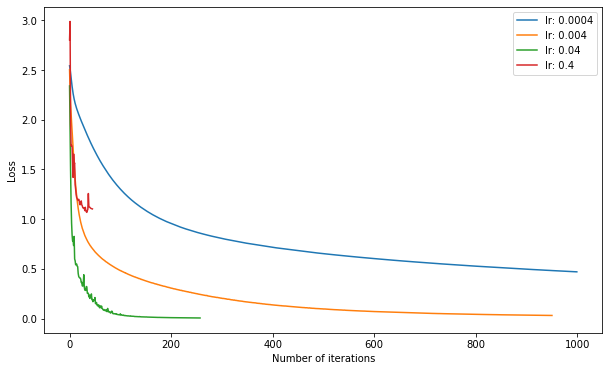

best learning rate:  0.004


In [63]:
fig, ax = plt.subplots(figsize=(10,6))

for lr in lr_list: 
    print(f'lr: {str(lr)}') # print the learning rate to see which one does not converge
    mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr, hidden_layer_sizes=best_hidden_layer_sizes, batch_size=best_batch_size)
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_test, y_test)
    ax.plot(mlp.loss_curve_, label=f'lr: {str(lr)}')

ax.legend()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

print("best learning rate: ", max(scores, key=scores.get))

**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">
<strong>ANSWER A.Q2</strong>:<br>

Immediatly, we see that if the learning rate is too small (i.e. 0.0004) the training does not converge. This happens because the opimizer steps are too small and it takes longer to reach the minimum. On the other hand, if the learning rate is too large (i.e. 0.4) the training converges to a local minimum, and not to the global minimum. This happens because the optimizer steps are too large and it overshoots the minimum. <br>

A good learning rate is the one that allows the training to converge to the global minimum in a reasonable amount of time. In this case, the best learning rate is 0.004. However, this is close to not converging in 1000 steps (the maximum number of steps allowed by the optimizer). A possibly better value for the learning rate is 0.04, which converges much faster to the same global minimum. <br>


</div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.218807


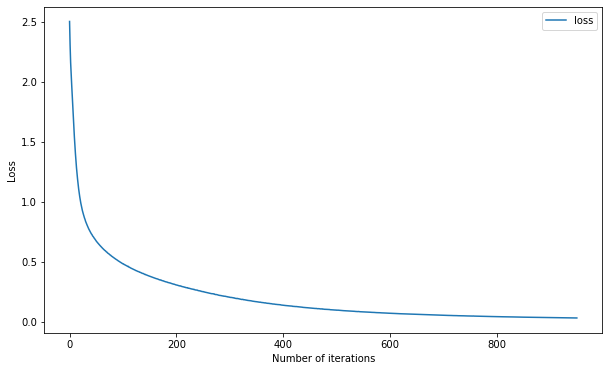

In [65]:
best_learning_rate = max(scores, key=scores.get)

mlp = MLPClassifier(
    max_iter=1000, 
    alpha=1e-4, 
    solver='sgd', 
    tol=1e-4, 
    random_state=ID, 
    learning_rate_init=best_learning_rate, 
    hidden_layer_sizes=best_hidden_layer_sizes, 
    batch_size=best_batch_size
)
mlp.fit(X_train, y_train)

training_score = mlp.score(X_train, y_train)
training_error = 1 - training_score

test_score = mlp.score(X_test, y_test)
test_error = 1 - test_score

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(mlp.loss_curve_, label="loss")
ax.legend(loc = 1)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [66]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Training dataset shape: ", X_train.shape)
print("Test dataset shape: ", X_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Training dataset shape:  (20000, 784)
Test dataset shape:  (40000, 784)
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [1946 2006 2016 1988 2011 2027 1940 2010 2064 1992]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

Iteration 1, loss = 1.35787993
Iteration 2, loss = 0.77743994
Iteration 3, loss = 0.66430005
Iteration 4, loss = 0.60419534
Iteration 5, loss = 0.56634483
Iteration 6, loss = 0.53880282
Iteration 7, loss = 0.51866397
Iteration 8, loss = 0.50207514
Iteration 9, loss = 0.48871362
Iteration 10, loss = 0.47865839
Iteration 11, loss = 0.46794825
Iteration 12, loss = 0.46058228
Iteration 13, loss = 0.45166378
Iteration 14, loss = 0.44535626
Iteration 15, loss = 0.43927585
Iteration 16, loss = 0.43213306
Iteration 17, loss = 0.42734799
Iteration 18, loss = 0.42256502
Iteration 19, loss = 0.41801179
Iteration 20, loss = 0.41361340
Iteration 21, loss = 0.40968631
Iteration 22, loss = 0.40449871
Iteration 23, loss = 0.40090658
Iteration 24, loss = 0.39814597
Iteration 25, loss = 0.39466553
Iteration 26, loss = 0.39130403
Iteration 27, loss = 0.38847978
Iteration 28, loss = 0.38528799
Iteration 29, loss = 0.38228523
Iteration 30, loss = 0.37972040
Iteration 31, loss = 0.37594096
Iteration 32, los

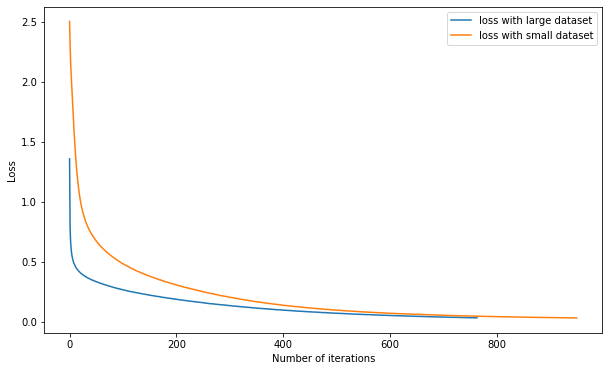

In [67]:
mlp_large = MLPClassifier(
    max_iter=1000, 
    alpha=1e-4, 
    solver='sgd', 
    tol=1e-4, 
    random_state=ID, 
    learning_rate_init=best_learning_rate, 
    hidden_layer_sizes=best_hidden_layer_sizes, 
    batch_size=best_batch_size,
    verbose=True
)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1 - mlp_large.score(X_train, y_train)
test_error = 1 - mlp_large.score(X_test, y_test)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(mlp_large.loss_curve_, label="loss with large dataset")
ax.plot(mlp.loss_curve_, label="loss with small dataset")
ax.legend(loc = 1)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">
<strong>ANSWER B.Q1</strong>:<br>

I am reporting here the results I've obtained to compare them, as re-running the notebook may change the results. <br>

| Dataset size | Train error | Test error |
|--------------|-------------|------------|
| 500          | 0.000000    | 0.218807   |
| 20000        | 0.003750    | 0.142100   |

The training error in the case of 500 samples is 0, meaning that the model perfectly fits the training set. This is not the case for the 20000 samples, where the training error is 0.003750. However, the test error is higher in the case of 500 samples (0.218807) than in the case of 20000 samples (0.142100). This means that the model is overfitting the training set, and it is not generalizing well to the test set. 
Indeed, having such a small training set makes it difficult for the model to generalize well to the test set. <br>

As expected though, enlarging the training set makes the training error higher, but it also makes the test error lower. <br>

</div>

**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


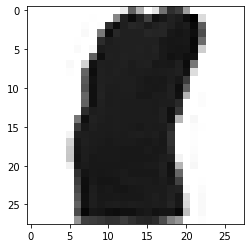

LABEL: 0
NN prediction for m=500: 3
NN prediction for m=20000: 0


In [68]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    if p != l and pl == l:
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


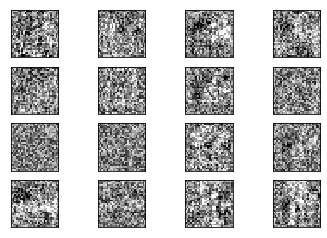

Weights with 20000 data points:


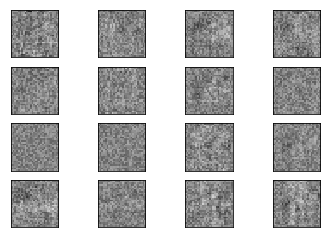

In [69]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">
<strong>ANSWER B.Q2</strong>:<br>

The first thing we notice is that in the case of 500 samples, the weights are much more noisy than in the case of 20000 samples. In fact, it is really hard to understand what is going on in the case of 500 samples. Sometimes in the 20000 samples case it seems that the weights slightly reproduce the images we are feeding to the network. <br>

</div>

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [70]:
m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = SVC(C=10, kernel='rbf', gamma=0.01, random_state=ID)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1-SVM.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1-SVM.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0020000000000000018
Test score SVM:
0.19815126050420173


In [71]:
m_training = 20000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = SVC(C=10, kernel='rbf', gamma=0.01, random_state=ID)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1-SVM.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1-SVM.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.02090000000000003
Test score SVM:
0.11199999999999999


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">
<strong>ANSWER B.Q3</strong>:<br>

Let me report here the results I've obtained to compare them, as re-running the notebook may change the results. <br>

| Model | Dataset size | Train error | Test error |
|-------|--------------|-------------|------------|
| SVM   | 500          | 0.002000    | 0.198151   |
| SVM   | 20000        | 0.020900    | 0.111999   |
| NN    | 500          | 0.000000    | 0.218807   |
| NN    | 20000        | 0.003750    | 0.142100   |

The SVM model generally achieves worse train errors than the NN model. However, the test errors are lower for the SVM model. This means that the SVM model is less overfitting the training set, and it is generalizing better to the test set. <br>

</div>